In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("/content/BAF3A.csv")

In [4]:
#1db hiányzó sor eldobása
df.dropna(inplace=True)
#Adatok szétszedése
X = df.drop(['ClassName', 'ClassValue'],axis=1)
y = df['ClassValue']

In [5]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2038
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FromY         2038 non-null   float64
 1   ToY           2038 non-null   float64
 2   MeanY         2038 non-null   float64
 3   DEL           2038 non-null   float64
 4   DES           2038 non-null   float64
 5   Ellenallas10  2038 non-null   float64
 6   Ellenallas40  2038 non-null   float64
 7   Gamma         2038 non-null   float64
 8   Laterolog     2038 non-null   float64
 9   Magneses      2038 non-null   float64
 10  Neutron       2038 non-null   float64
 11  Nyiro         2038 non-null   float64
 12  Primer        2038 non-null   float64
 13  Tavolsag      2038 non-null   float64
 14  TermPot       2038 non-null   float64
dtypes: float64(15)
memory usage: 254.8 KB
<class 'pandas.core.series.Series'>
Index: 2038 entries, 0 to 2038
Series name: ClassValue
Non-Null Count  Dtype
-----------

In [6]:
X.head()

,FromY,ToY,MeanY,DEL,DES,Ellenallas10,Ellenallas40,Gamma,Laterolog,Magneses,Neutron,Nyiro,Primer,Tavolsag,TermPot
0,639.93,641.81,-640.870,2.58997,2.56996,22.930000,89.419998,22.889999,165.169998,-2.83251,27.690001,3044.139893,5102.450195,-640.9,-424.000000
1,641.81,641.89,-641.850,2.59000,2.58000,21.400101,82.090500,19.540001,156.330994,-2.82754,30.730000,2972.870117,4932.569824,-641.8,-424.998993
2,641.89,642.19,-642.040,2.54000,2.56000,21.010099,79.000702,20.610001,154.429993,-2.82367,29.360001,3016.590088,4975.049805,-642.0,-426.998993
3,642.19,642.60,-642.395,2.51001,2.57002,19.980000,75.019997,23.500000,147.039993,-2.83810,28.940001,2979.520020,4948.189941,-642.4,-432.000000
4,642.60,643.22,-642.910,2.53000,2.61998,18.340000,67.279999,25.670000,137.509995,-2.84827,32.229999,2855.100098,4841.290039,-642.9,-429.000000


In [7]:
#teszt és tanító adatokra bontás
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=41)


In [8]:
#---------------------------------RANDOM FOREST----------------------------------------------------------------

#Adatok standardizálása 0 és 1 közé, majd a train és teszt adatok átalakítása
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#erdő pldányosítása 500 becslővel
forest = RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train_std,y_train)
print("Test Accuracy: %0.2f" % forest.score(X_test_std, y_test))

Test Accuracy: 0.81


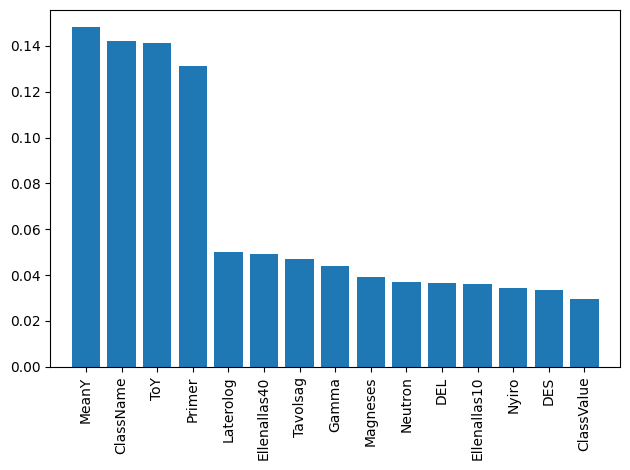

In [9]:
importances = forest.feature_importances_#erdőben levő adatok fontossága
indicies = np.argsort(importances)[::-1]#indexelés

#y érték beállítása
plt.ylabel = "Feature Importances"
plt.bar(range(X_train.shape[1]),importances[indicies],align='center')

#x érték beállítása
feature_labels = df.columns[1:]
plt.xticks(range(X_train.shape[1]),feature_labels[indicies],rotation=90)
plt.xlim([-1,X_train.shape[1]])

#grafikon mentése és mutatása
plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [12]:
#----------------------------------------SUPPORT VECTOR MACHINE-----------------------------------------------------
svc = SVC(kernel='rbf')

#C és gamma hiperparaméterek beállítása
parameters = {
    'C' : (100,1e3,1e4,1e5),
    'gamma' : (1e-8,1e-7,1e-6,1e-5)
}

#Gridsearch példányosítása, illesztése
gridsearch = GridSearchCV(svc,parameters, n_jobs = 1, cv=5)
gridsearch.fit(X_train,y_train)

svc_best = gridsearch.best_estimator_#legjobb becslő
accuracy = svc_best.score(X_test,y_test)#legjobb becslő pontossága teszt adatoton
prediction = svc_best.predict(X_test)#legjobb becslő előrejelzése

#legjobb paraméterek, pontosság kiírása
print(f"Legjobb paraméterek: {gridsearch.best_params_}")
print(f'Pontosság: {accuracy*100:.1f}%')

#report készítése a teszt és predictionből
report = classification_report(y_test,prediction)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Legjobb paraméterek: {'C': 10000.0, 'gamma': 1e-07}
Legjobb pontosság: 0.8300613496932516
The accuracy is: 83.6%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.96      0.86        96
           5       1.00      0.05      0.09        21
           6       0.87      0.98      0.92       250
           7       0.57      0.11      0.18        37
           8       0.00      0.00      0.00         3

    accuracy                           0.84       408
   macro avg       0.54      0.35      0.34       408
weighted avg       0.82      0.84      0.79       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'Permutation Importance')

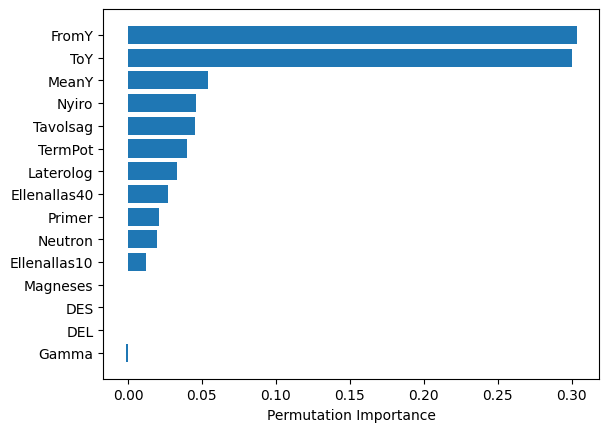

In [19]:
#SVM-nél jellemzők fontossága

perm_importance = permutation_importance(svc_best, X_test, y_test)# svc bestben jellemzők fontossága a teszt adatokon

X_names = X.columns.to_list()#x oszlopai listává alakítása
features = np.array(X_names)#lista numpy tömbbé alakítása

sorted_idx = perm_importance.importances_mean.argsort()#argumentuom rendezése
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")